In [84]:
import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from scipy.stats import gaussian_kde
import seaborn as sns
import re

import importlib
import toylosses
importlib.reload(toylosses)
import toynn
importlib.reload(toynn)
import toyvis
importlib.reload(toyvis)

import torch
sns.set()

DEVICE = 'cuda'
OUTPUT = '/scratch/users/nmiolane/toyoutput'

# Decide on experiment's configuration

layers.0.weight tensor([[ 0.6000],
        [-5.7000]], device='cuda:0') 

layers.0.bias tensor([ 0.0000, -0.1000], device='cuda:0') 

layers.1.weight tensor([[ 10.,   6.],
        [ -9., -10.]], device='cuda:0') 

layers.1.bias tensor([-100., -100.], device='cuda:0') 

layers.2.weight tensor([[10.,  0.],
        [ 0., -5.]], device='cuda:0') 

layers.2.bias tensor([2., 0.], device='cuda:0') 

layers.3.weight tensor([[-100., -100.],
        [-100., -100.]], device='cuda:0') 

layers.3.bias tensor([-100., -100.], device='cuda:0') 



(0.970026209909856, 23.6077650040794, -125.80271160134153, 5.992195243919658)

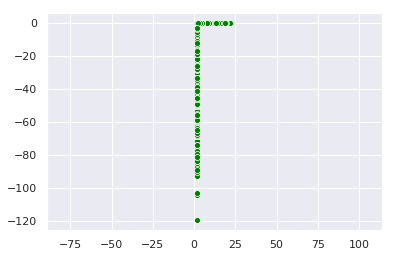

In [218]:
DATA_DIM = 2
LATENT_DIM = 1
N_DECODER_LAYERS = 3
NONLINEARITY = True
N_SAMPLES = 10000
WITH_BIASX = True
WITH_LOGVARX = True

W_TRUE = {}
B_TRUE = {}

W_TRUE[0] = [[.6], [-5.7]]
B_TRUE[0] = [0., -0.1]

W_TRUE[1] = [[10., 6.], [-9., -10.]]
B_TRUE[1] = [-100., -100.]

# For the reconstruction
W_TRUE[2] = [[10., 0.], [0., -5.]]
B_TRUE[2] = [2., 0.]

# For the logvarx
W_TRUE[3] = [[-100., -100.], [-100., -100.]]
B_TRUE[3] = [-100., -100.]

if WITH_LOGVARX:
    assert len(W_TRUE) == N_DECODER_LAYERS + 1, len(W_TRUE)
else:
    assert len(W_TRUE) == N_DECODER_LAYERS

WITH_BIASZ = True
WITH_LOGVARZ = True

decoder_true = toynn.make_decoder_true(
    w_true=W_TRUE, b_true=B_TRUE, latent_dim=LATENT_DIM, 
    data_dim=DATA_DIM, n_layers=N_DECODER_LAYERS,
    nonlinearity=NONLINEARITY, with_biasx=WITH_BIASX, with_logvarx=WITH_LOGVARX)

for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

generated_true_x = toynn.generate_from_decoder(decoder_true, N_SAMPLES)

fig, ax = plt.subplots()
ax = toyvis.plot_data(generated_true_x, color='green', label='from decoder true', ax=ax)
ax.axis('equal')

# Inspect generation of synthetic data from decoder_true

In [175]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

layers.0.weight tensor([[ 0.6000],
        [-0.7000]], device='cuda:0') 

layers.0.bias tensor([ 0.0000, -0.1000], device='cuda:0') 

layers.1.weight tensor([[10.,  0.],
        [ 0., -5.]], device='cuda:0') 

layers.1.bias tensor([2., 0.], device='cuda:0') 

layers.2.weight tensor([[0., 0.],
        [0., 0.]], device='cuda:0') 

layers.2.bias tensor([0., 0.], device='cuda:0') 



In [155]:
# TODO(nina): Add a comparison to a FA?

# Inspect results from standard VAE

-- True values of parameters
layers.0.weight tensor([[ 0.6000],
        [-0.7000]], device='cuda:0') 

layers.0.bias tensor([ 0.0000, -0.1000], device='cuda:0') 

layers.1.weight tensor([[10.,  0.],
        [ 0., -5.]], device='cuda:0') 

layers.1.bias tensor([2., 0.], device='cuda:0') 

layers.2.weight tensor([[0., 0.],
        [0., 0.]], device='cuda:0') 

layers.2.bias tensor([0., 0.], device='cuda:0') 


-- Learnt values of parameters
layers.0.weight tensor([[ 0.6173],
        [-0.6216]], device='cuda:0') 

layers.0.bias tensor([ 1.3559, -1.6938], device='cuda:0') 

layers.1.weight tensor([[ 2.2002, -0.3396],
        [-0.4842,  0.5791]], device='cuda:0') 

layers.1.bias tensor([ 1.3150, -0.4553], device='cuda:0') 

layers.2.weight tensor([[ 1.1083,  0.1278],
        [ 0.5776, -0.0298]], device='cuda:0') 

layers.2.bias tensor([0.5741, 0.6079], device='cuda:0') 

Last losses:
[0.1497068026661873, 0.14915091699361802, 0.1498452787399292, 0.14956466609239577, 0.14914862048625946]


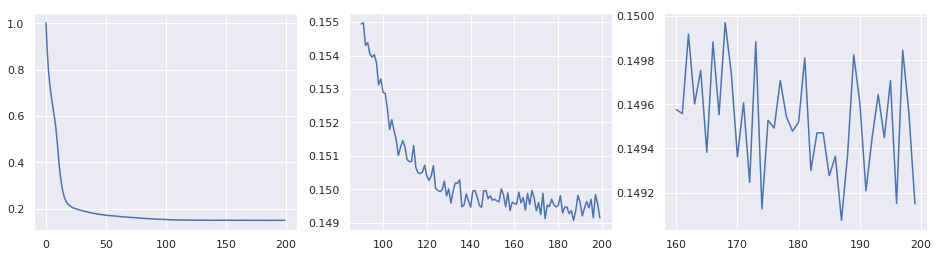

In [176]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

decoder_path = glob.glob(f'{OUTPUT}/train_vae/models/decoder.pth')[0]
decoder = torch.load(decoder_path, map_location=DEVICE)

print('-- True values of parameters')
for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

print('\n-- Learnt values of parameters')
for name, param in decoder.named_parameters():
    print(name, param.data, '\n')
    
losses_vae_path = glob.glob(f'{OUTPUT}/train_vae/train_losses.pkl')[0]
train_losses_all_epochs = pickle.load(open(losses_vae_path, 'rb'))

train_losses_total = [loss['total'] for loss in train_losses_all_epochs]
n_epochs = len(train_losses_total)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

ax = axes[0]
ax.plot(range(n_epochs), train_losses_total)

ax = axes[1]
ax.plot(range(90, n_epochs), train_losses_total[90:])

ax = axes[2]
ax.plot(range(160, n_epochs), train_losses_total[160:])

print('Last losses:')
print(train_losses_total[-5:])

(-6.039029157504746, 23.082172768232716, -16.66602428389796, 6.311862572128717)

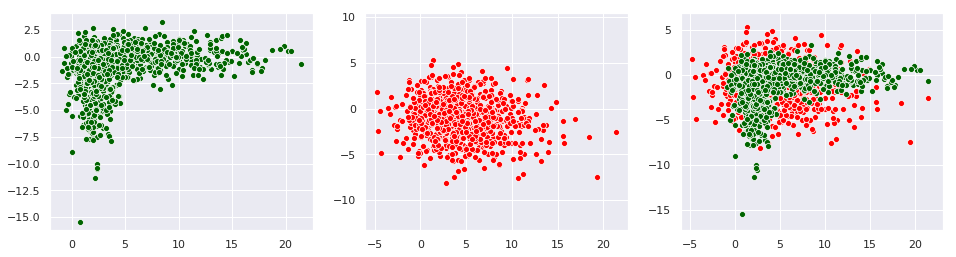

In [177]:
n_samples = 1000
generated_true_x = toynn.generate_from_decoder(decoder_true, n_samples)
generated_x = toynn.generate_from_decoder(decoder, n_samples)

# For 1D
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
axis_side = 20

ax = axes[0]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
ax.axis('equal')

ax = axes[1]
toyvis.plot_data(generated_x, color='red', ax=ax)
ax.axis('equal')

ax = axes[2]
toyvis.plot_data(generated_x, color='red', ax=ax)
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)


ax.axis('equal')

# Inspect results from VEM

In [180]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

decoder_vem_path = glob.glob(f'{OUTPUT}/train_vem/models/decoder.pth')[0]
decoder_vem = torch.load(decoder_path, map_location=DEVICE)

print('-- True values of parameters')
for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

print('\n-- Learnt values of parameters')
for name, param in decoder_vem.named_parameters():
    print(name, param.data, '\n')
    
losses_vae_path = glob.glob(f'{OUTPUT}/train_vem/train_losses.pkl')[0]
train_losses_all_epochs = pickle.load(open(losses_vae_path, 'rb'))

plt.figure()
train_losses_total = [loss['total'] for loss in train_losses_all_epochs]
n_epochs = len(train_losses_total)
plt.plot(range(n_epochs), train_losses_total)
print('Last losses:')
print(train_losses_total[-5:])

IndexError: list index out of range

In [181]:
n_samples = 1000
generated_true_x = toynn.generate_from_decoder(decoder_true, n_samples)
generated_x = toynn.generate_from_decoder(decoder_vem, n_samples)

# For 1D
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
axis_side = 20

ax = axes[0]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
ax.axis('equal')

ax = axes[1]
toyvis.plot_data(generated_x, color='orange', ax=ax)
ax.axis('equal')

ax = axes[2]
toyvis.plot_data(generated_x, color='orange', ax=ax)
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)

ax.axis('equal')

NameError: name 'decoder_vem' is not defined

# Print pipeline logs

In [182]:
pattern = 'logs'
logs = []
for filename in os.listdir(OUTPUT):
    if re.search(pattern, filename):
        logs.append(filename)

print('Found %d log files.' % len(logs))
        
for filename in logs:
    path = os.path.join(OUTPUT, filename)
    print('\n-- Log file: %s\n' % filename)
    with open(path, 'r') as f:
        message = f.read()
    print(message)

Found 3 log files.

-- Log file: logs2019-04-10 01:18:28.176590.txt

2019-04-10 01:18:28,176 root         INFO     start
2019-04-10 01:18:28,191 luigi        INFO     logging configured by default settings
2019-04-10 01:18:28,215 luigi-interface DEBUG    Checking if RunAll() is complete
2019-04-10 01:18:28,216 luigi-interface DEBUG    Checking if TrainVAE() is complete
2019-04-10 01:18:28,217 luigi-interface DEBUG    Checking if TrainVEM() is complete
2019-04-10 01:18:28,217 luigi-interface INFO     Informed scheduler that task   RunAll__99914b932b   has status   PENDING
2019-04-10 01:18:28,217 luigi-interface DEBUG    Checking if MakeDataSet() is complete
2019-04-10 01:18:28,218 luigi-interface INFO     Informed scheduler that task   TrainVEM__99914b932b   has status   PENDING
2019-04-10 01:18:28,218 luigi-interface INFO     Informed scheduler that task   MakeDataSet__99914b932b   has status   DONE
2019-04-10 01:18:28,218 luigi-interface INFO     Informed scheduler that task   TrainVA